In [1]:
# cargando librerias que usare
import pandas as pd # libreria de manejo de funciones para ciencia de datos
import matplotlib.pyplot as plt # libraria para graficacion de datos
import seaborn as sns # libreria para visualizacion de datos
import warnings

from sklearn.cluster import KMeans

warnings.filterwarnings('ignore')

# Estadisticas Iniciales

In [2]:
pima = pd.read_csv("diabetes.csv") # Leer conjunto de datos
# visualizar los primeros 5 datos del dtaset
pima.head()
pima.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [3]:
# visualizar los primeros 20 datos del dtaset
pima.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
N, M = pima.shape
print("Numero de instancias: ", N)
print("Numero de atributos: ", M)

Numero de instancias:  768
Numero de atributos:  9


In [5]:
pima.groupby('Outcome').size()
# ver un compilado estadistico
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Exploracion visual de los datos
Vamos a visualizar estadisticas basicas de los datos

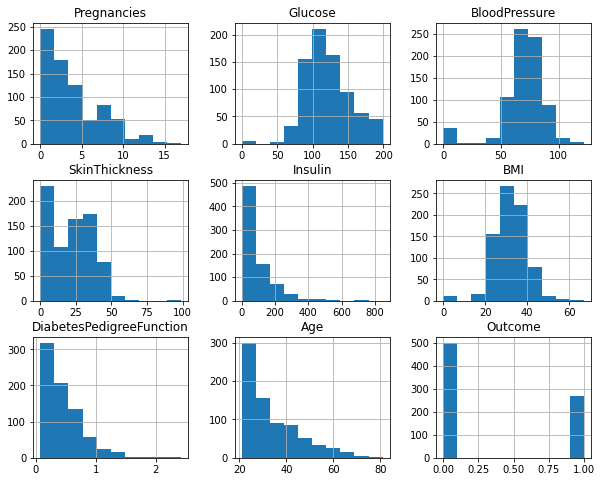

In [6]:
# visualizacion por histograma
pima.hist(figsize = (10,8))
plt.show()

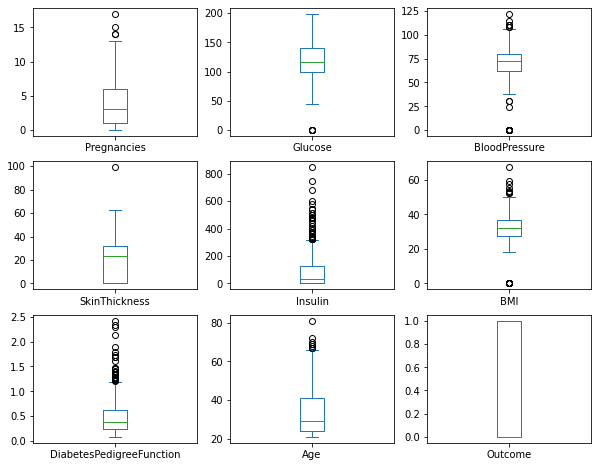

In [7]:
# grafico de boxplots
pima.plot(kind='box', subplots=True, layout=(3,3), sharex=False, figsize = (10,8))
plt.show()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


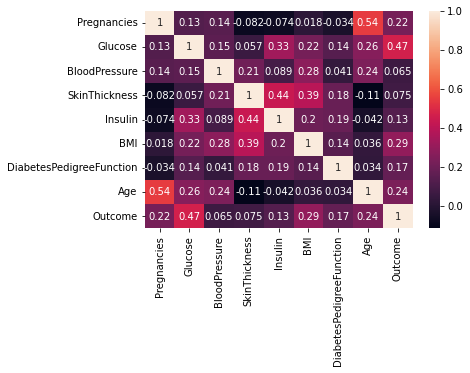

In [8]:
# heatmap
column_x = pima.columns[0:len(pima.columns)-1]
print(column_x)
corr = pima[pima.columns].corr()
sns.heatmap(corr, annot=True)
plt.show()

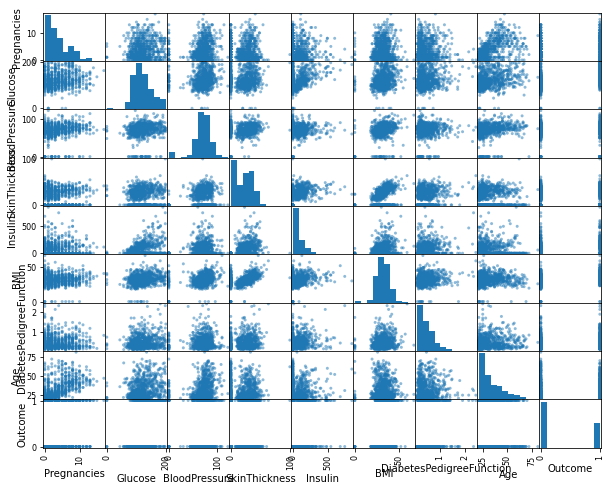

In [9]:
# scatter plot
pd.plotting.scatter_matrix(pima, figsize=(10,8))
plt.show()

## Preprocesamiento de datos
Etapa de preparacion de los datos antes de realizar la prediccion.

In [10]:
# comienzo separando los atributos de la clase
X = pima.iloc[:,0:8]
X # almacena todos los atributos

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [11]:
# separando la clase
Y = pima.iloc[:,8]
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [29]:
K =  4
kmeans = KMeans(n_clusters = K, init='random')
kmeans.fit(X)
centros = kmeans.cluster_centers_
centros

array([[3.25000000e+00, 1.12781818e+02, 7.00863636e+01, 2.84181818e+01,
        9.95090909e+01, 3.23859091e+01, 4.90859091e-01, 2.96090909e+01],
       [4.25061425e+00, 1.17201474e+02, 6.74054054e+01, 1.24766585e+01,
        2.88452088e+00, 3.07228501e+01, 4.17990172e-01, 3.49484029e+01],
       [3.45833333e+00, 1.63000000e+02, 7.08333333e+01, 3.28333333e+01,
        5.09166667e+02, 3.59000000e+01, 6.07375000e-01, 3.35416667e+01],
       [3.63247863e+00, 1.40358974e+02, 7.28205128e+01, 3.12307692e+01,
        2.22222222e+02, 3.48683761e+01, 5.95837607e-01, 3.40683761e+01]])

In [30]:
distance = KMeans.fit_transform(kmeans, X)
distance

array([[509.67085182, 107.76922596, 222.97312217,  41.5116064 ],
       [515.23956486, 103.59256203, 229.31113946,  36.92438409],
       [510.83968553, 125.65092365, 228.93519183,  67.69744788],
       ...,
       [399.64053613,  17.26618801, 112.63131266, 109.99091766],
       [511.89448154, 106.29609126, 225.66696229,  21.27067792],
       [514.10335111, 101.7485631 , 227.55896202,  33.12587481]])

In [31]:
nombres_clusters = kmeans.labels_
nombres_clusters

array([3, 3, 3, 1, 2, 3, 1, 3, 0, 3, 3, 3, 3, 0, 2, 3, 2, 3, 1, 1, 2, 3,
       3, 3, 1, 1, 3, 1, 1, 3, 3, 2, 1, 3, 3, 2, 3, 3, 3, 2, 1, 3, 3, 2,
       3, 3, 3, 3, 3, 3, 1, 3, 3, 2, 2, 3, 2, 1, 3, 1, 3, 3, 3, 1, 3, 3,
       3, 3, 3, 1, 1, 1, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 1,
       1, 3, 3, 2, 1, 3, 1, 2, 3, 1, 1, 2, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3,
       1, 0, 3, 3, 2, 3, 3, 3, 3, 1, 1, 3, 1, 3, 3, 1, 1, 1, 1, 3, 2, 3,
       2, 3, 3, 1, 1, 1, 3, 2, 3, 3, 1, 3, 2, 3, 3, 1, 3, 3, 2, 3, 2, 0,
       3, 3, 1, 1, 1, 1, 3, 1, 2, 3, 3, 1, 3, 3, 3, 1, 3, 1, 3, 1, 1, 1,
       3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 0, 1, 1, 2, 3, 1, 3, 3, 3, 2, 3, 3,
       1, 2, 3, 3, 3, 3, 2, 3, 2, 3, 1, 3, 3, 3, 3, 1, 2, 2, 1, 1, 3, 3,
       0, 3, 3, 2, 1, 3, 3, 3, 0, 1, 3, 0, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1,
       3, 2, 2, 3, 3, 0, 0, 3, 3, 3, 1, 3, 2, 3, 3, 3, 0, 1, 1, 3, 3, 3,
       3, 1, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 1, 3, 3, 1,
       0, 2, 3, 1, 3, 1, 2, 2, 3, 1, 2, 2, 2, 3, 3,

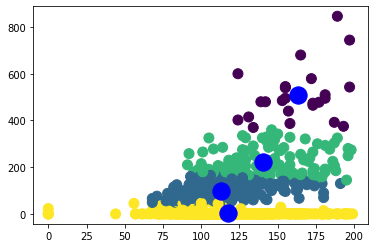

In [32]:
plt.scatter(X.iloc[:, 1], X.iloc[:, 4], s=100, c=kmeans.labels_)
plt.scatter(centros[:, 1], centros[:, 4], s=300, c='blue', label = 'Centroides')

plt.show()